# Part a

The expected peak velocity is roughly 12845.07 m/s


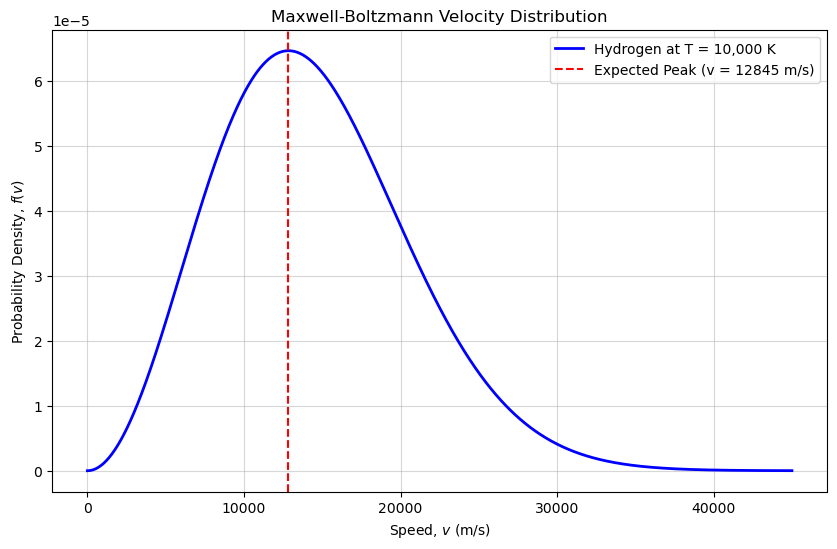

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Define Constants (SI Units) ---
T = 10000.0                # Temperature in Kelvin
k = 1.380649e-23           # Boltzmann constant in J/K
m = 1.6735575e-27          # Mass of a Hydrogen atom in kg

# --- 2. Create Velocity Array ---
# 0 to 45,000 m/s
v = np.linspace(0, 45000, 1000)

# --- 3. Calculate the Distribution f(v) ---
# f(v) = (m/2pikT)^3/2 * 4piv^2 * exp (-mv^2/2kT)
term1 = (m / (2 * np.pi * k * T))**(1.5)
term2 = 4 * np.pi * v**2
term3 = np.exp(-m * v**2 / (2 * k * T))

f_v = term1 * term2 * term3

# --- 4. Calculate Expected Peak (Most Probable Speed) ---
v_peak = np.sqrt(2 * k * T / m)
print(f"The expected peak velocity is roughly {v_peak:.2f} m/s")

# --- 5. Plotting ---
plt.figure(figsize=(10, 6))

# Plot the main distribution
plt.plot(v, f_v, 'b-', linewidth=2, label='Hydrogen at T = 10,000 K')

# Draw a vertical line exactly where the peak should be
plt.axvline(v_peak, color='red', linestyle='--', label=f'Expected Peak (v = {v_peak:.0f} m/s)')

# Formatting
plt.title('Maxwell-Boltzmann Velocity Distribution')
plt.xlabel('Speed, $v$ (m/s)')
plt.ylabel('Probability Density, $f(v)$')
plt.grid(True, alpha=0.5)
plt.legend()

plt.show()

# Part b

In [8]:
import math

# --- 1. Constants (SI Units) ---
T = 10000.0                # Temperature in Kelvin
k = 1.380649e-23           # Boltzmann constant in J/K
m = 1.6735575e-27          # Mass of a Hydrogen atom in kg

# --- 3. Calculate the required energy to jump from n=1 to n=2
# Energy differernce = E2 - E1
delta_E_eV = -13.6 / (2**2) - -13.6 / (1**2) # Energy level formula for Hydrogen: E_n = -13.6 eV / n^2
delta_E = delta_E_eV * 1.602176634e-19 # Conversion factor (eV to Joules)

print(f"Energy required (Delta E): {delta_E_eV:.2f} eV")

# --- 3. Calculate Minimum Speed (v_min) ---
# Kinetic Energy = 1/2 * m * v^2  =>  v = sqrt(2 * K / m)
v_min = math.sqrt(2 * delta_E / m)
print(f"Minimum speed required:    {v_min:.2f} m/s\n")

# --- 4. Define the Maxwell-Boltzmann Distribution f(v) ---
def f(v):
    term1 = (m / (2 * math.pi * k * T))**(1.5)
    term2 = 4 * math.pi * v**2
    term3 = math.exp(-m * v**2 / (2 * k * T))
    return term1 * term2 * term3

# --- 5. Numerical Integration (RK2 / Trapezoidal) ---
v = v_min
v_max = 150000.0  # Safe proxy for "infinity" to capture the tail
h = 10.0          # Step size in m/s
fraction = 0.0    # This will hold our cumulative area (the fraction of atoms)

steps = round((v_max - v) / h)

for _ in range(steps):
    # Calculate the area of the trapezoid for this tiny slice
    k1 = f(v)
    k2 = f(v + h)
    
    # Add to the total fraction
    fraction += (h / 2) * (k1 + k2)
    
    # Step forward
    v += h

print(f"Fraction of atoms moving fast enough: {fraction:.6e}")

Energy required (Delta E): 10.20 eV
Minimum speed required:    44192.64 m/s

Fraction of atoms moving fast enough: 2.922799e-05


The fraction of hydrogen atoms that are moving fast enough for kinetic energy to be enough to exite the atom from the ground state to the first excited state ($\Delta E = 10.20$ eV and $v_{min} = 44192.64$ m/s) is $2.92* 10^{-5}$.

# Part c

In [10]:
import math

# --- 1. Constants (SI Units) ---
T = 10000.0                # Temperature in Kelvin
k = 1.380649e-23           # Boltzmann constant in J/K
m = 1.6735575e-27          # Mass of a Hydrogen atom in kg

# --- 3. Calculate the required energy to jump from n=1 to n=2
# Energy differernce = E2 - E1
delta_E_eV = -13.6 / (2**2) - -13.6 / (1**2) # Energy level formula for Hydrogen: E_n = -13.6 eV / n^2
delta_E = delta_E_eV * 1.602176634e-19 # Conversion factor (eV to Joules)

print(f"Energy required (Delta E): {delta_E_eV:.2f} eV")

# --- 3. Calculate Minimum Speed (v_min) ---
# Kinetic Energy = 1/2 * m * v^2  =>  v = sqrt(2 * K / m)
v_min = math.sqrt(2 * delta_E / m)
print(f"Minimum speed required:    {v_min:.2f} m/s\n")

# --- 4. Define the Maxwell-Boltzmann Distribution f(v) ---
def f(v):
    term1 = (m / (2 * math.pi * k * T))**(1.5)
    term2 = 4 * math.pi * v**2
    term3 = math.exp(-m * v**2 / (2 * k * T))
    return term1 * term2 * term3

# --- 5. Numerical Integration (RK2 / Trapezoidal) ---
def integrate_fraction(h, v_max):
    v = v_min
    fraction = 0.0
    steps = round((v_max - v) / h)
    for _ in range(steps):
        k1 = f(v)
        k2 = f(v + h)
        fraction += (h / 2) * (k1 + k2)
        v += h
    return fraction

Energy required (Delta E): 10.20 eV
Minimum speed required:    44192.64 m/s



In [13]:
# Step Size (h) Convergence Study ---
print("1. Step Size Convergence (Fixed v_max = 100,000 m/s)")
v_max_safe = 100000.0
h_values = [100.0, 10.0, 1.0, 0.1]
h_results = []

for h in h_values:
    ans = integrate_fraction(h, v_max_safe)
    h_results.append(ans)
    print(f"h = {h:<6} | Fraction = {ans:.12e}")

# Error from step size = Difference between the two finest resolutions
h_error = abs(h_results[-1] - h_results[-2])
print(f"Estimated Error from h: ~ {h_error:.2e}\n")


# Upper Limit (v_max) Convergence Study ---
print("2. Upper Limit Convergence (Fixed h = 1.0) ")
h_safe = 1.0
vmax_values = [50000.0, 60000.0, 70000.0, 100000.0]
vmax_results = []

for vmax in vmax_values:
    ans = integrate_fraction(h_safe, vmax)
    vmax_results.append(ans)
    print(f"v_max = {vmax:<8} | Fraction = {ans:.12e}")

# Error from cutoff = Difference between the two largest cutoffs
vmax_error = abs(vmax_results[-1] - vmax_results[-2])
print(f"Estimated Error from v_max cutoff: ~ {vmax_error:.2e}")

1. Step Size Convergence (Fixed v_max = 100,000 m/s)
h = 100.0  | Fraction = 2.923407883513e-05
h = 10.0   | Fraction = 2.922799167198e-05
h = 1.0    | Fraction = 2.922793079831e-05
h = 0.1    | Fraction = 2.922793018999e-05
Estimated Error from h: ~ 6.08e-13

2. Upper Limit Convergence (Fixed h = 1.0) 
v_max = 50000.0  | Fraction = 2.803649507102e-05
v_max = 60000.0  | Fraction = 2.922612840760e-05
v_max = 70000.0  | Fraction = 2.922793000669e-05
v_max = 100000.0 | Fraction = 2.922793079831e-05
Estimated Error from v_max cutoff: ~ 7.92e-13


Convergence of Step Size ($h$): By holding the upper integration limit constant at $100,000 \text{ m/s}$ and decreasing the step size from $100$ down to $0.1 \text{ m/s}$, the solution rapidly converged. The difference between the $h=1.0$ and $h=0.1$ runs was on the order of $\sim 10^{-13}$.\\
Convergence of Upper Limit ($v_{max}$): By holding the step size constant at $1.0 \text{ m/s}$ and increasing the upper limit toward "infinity" ($50\text{k} \text{to} 100\text{k} \text{ m/s}$), the solution rapidly converged. The difference between the $v_{max}=100000$ and $v_{max}=70000$ runs was on the order of $\sim 10^{-13}$.